In [20]:

import pandas as pd
import pycaret
import seaborn as sns
from pycaret.clustering import *
from pycaret.clustering import ClusteringExperiment
from sklearn.feature_selection import SelectFpr, chi2
from sklearn.feature_selection import f_classif
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.feature_selection import SelectFdr, chi2
import warnings
warnings.filterwarnings("ignore")


In [21]:
# Rows are the features
# Columns are the images

MainFeatureData = pd.read_csv("./data_feature.csv")
MainFeatureData


,2,0,0.1,0.2,0.3,1,1.1,5,0.4,1.2,...,0.257,0.258,0.259,0.260,1.155,0.261,0.262,1.156,1.157,0.263
0,1,1,1,0,1,0,1,0,0,4,...,1,1,0,0,0,1,0,0,0,0
1,0,0,1,4,0,1,0,4,3,1,...,1,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,0,2,0,0,4,0,0,0,1
3,1,1,0,0,1,0,1,0,0,2,...,2,1,0,0,3,0,1,1,0,1
4,2,0,1,0,2,1,0,0,0,4,...,0,2,0,1,0,3,2,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0,1,0,1,1,0,0,0,0,1,...,2,0,0,3,5,2,1,1,0,0
175,2,0,0,1,1,4,2,2,1,2,...,2,1,1,0,1,0,0,1,0,0
176,0,1,2,0,0,0,0,1,0,2,...,2,1,0,0,0,1,1,1,1,1
177,1,0,2,1,1,2,1,4,0,0,...,0,0,0,0,4,2,0,0,1,2


In [22]:

column_names = list(MainFeatureData.columns.values)
print(column_names)


['2', '0', '0.1', '0.2', '0.3', '1', '1.1', '5', '0.4', '1.2', '0.5', '0.6', '2.1', '0.7', '0.8', '1.3', '1.4', '0.9', '0.10', '0.11', '1.5', '1.6', '2.2', '2.3', '1.7', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '1.8', '1.9', '0.23', '1.10', '1.11', '0.24', '0.25', '0.26', '1.12', '0.27', '1.13', '2.4', '0.28', '0.29', '0.30', '1.14', '1.15', '1.16', '1.17', '0.31', '0.32', '1.18', '0.33', '0.34', '3', '0.35', '1.19', '1.20', '1.21', '0.36', '0.37', '0.38', '2.5', '1.22', '0.39', '1.23', '1.24', '1.25', '2.6', '1.26', '2.7', '0.40', '0.41', '1.27', '1.28', '3.1', '1.29', '2.8', '1.30', '0.42', '0.43', '1.31', '3.2', '1.32', '1.33', '0.44', '4', '0.45', '2.9', '0.46', '1.34', '0.47', '1.35', '1.36', '0.48', '3.3', '1.37', '1.38', '0.49', '0.50', '1.39', '0.51', '1.40', '3.4', '0.52', '0.53', '0.54', '0.55', '2.10', '0.56', '1.41', '1.42', '1.43', '0.57', '1.44', '3.5', '0.58', '0.59', '2.11', '2.12', '0.60', '0.61', '3.6', '2.13', '2.14', '0

In [23]:
# Each column is the image, the transpose for converting row to column
MainImage = pd.read_csv("./data_feature.csv").T
MainImage


,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
2,1,0,0,1,2,8,0,2,0,3,...,0,2,1,5,0,0,2,0,1,1
0,1,0,0,1,0,0,0,0,2,0,...,0,0,2,0,1,1,0,1,0,2
0.1,1,1,0,0,1,0,2,3,0,1,...,1,0,0,0,0,0,0,2,2,1
0.2,0,4,0,0,0,0,0,2,0,0,...,3,1,1,1,0,1,1,0,1,1
0.3,1,0,0,1,2,0,0,2,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.261,1,0,4,0,3,1,0,3,1,0,...,0,0,0,0,1,2,0,1,2,0
0.262,0,0,0,1,2,0,0,1,3,1,...,0,0,2,1,1,1,0,1,0,0
1.156,0,0,0,1,0,3,0,0,0,2,...,0,0,2,0,1,1,1,1,0,1
1.157,0,0,0,0,0,1,1,0,0,0,...,1,1,0,0,5,0,0,1,1,1


In [24]:

X = MainFeatureData.drop(['0.263'], axis=1)   # this is the data or the image
y = MainFeatureData[['0.263']]       # this is the target
print(X.shape)
print(y.shape)


(179, 499)
(179, 1)


In [25]:

km = KMeans(init="random", n_clusters=5)
km.fit(MainFeatureData)


KMeans(init='random', n_clusters=5)

In [26]:
First_set_label = km.labels_


In [27]:
km.cluster_centers_


array([[0.        , 0.5       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [2.41666667, 0.375     , 0.66666667, ..., 1.25      , 0.58333333,
        0.41666667],
       [0.78145695, 0.62913907, 1.17880795, ..., 0.60264901, 1.        ,
        0.97350993],
       [3.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
cluster_labels = km.predict(MainFeatureData)


In [29]:
cluster_labels


array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 4, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2])

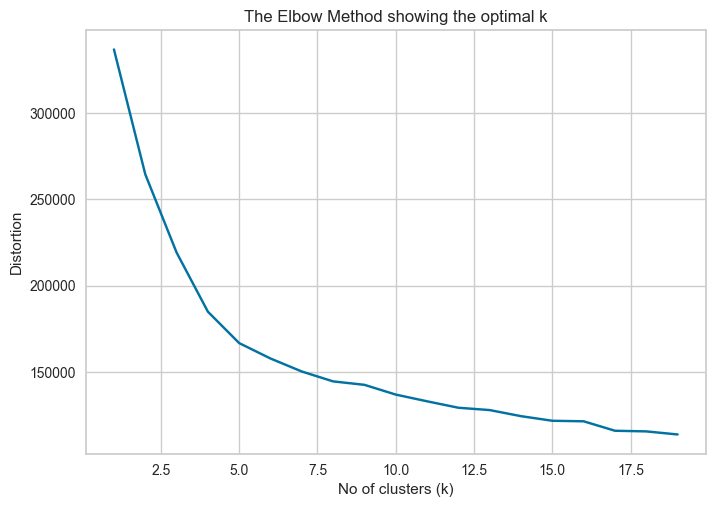

In [30]:

# k-means determine k
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(MainFeatureData)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


## 2) Spectral Clustering


In [31]:

model_2 = SpectralClustering(
    n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans').fit(MainFeatureData)
model_2


SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

In [32]:
model_2.labels_


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1])

#### 3) Applying Non-Negative Matrix Factorization (NMF)


In [33]:

# 10, 20, 30, 40, 50, 100
import numpy as np
from sklearn.decomposition import NMF

X_NMF_New_1 = NMF(n_components=10, init='random',
                  random_state=0).fit_transform(X)
X_NMF_New_2 = NMF(n_components=20, init='random',
                  random_state=0).fit_transform(X)
X_NMF_New_3 = NMF(n_components=30, init='random',
                  random_state=0).fit_transform(X)
X_NMF_New_4 = NMF(n_components=40, init='random',
                  random_state=0).fit_transform(X)
X_NMF_New_5 = NMF(n_components=50, init='random',
                  random_state=0).fit_transform(X)
X_NMF_New_6 = NMF(n_components=100, init='random',
                  random_state=0).fit_transform(X)


In [34]:
print(X_NMF_New_1.shape)
print(X_NMF_New_2.shape)
print(X_NMF_New_3.shape)
print(X_NMF_New_4.shape)
print(X_NMF_New_5.shape)
print(X_NMF_New_6.shape)


(179, 10)
(179, 20)
(179, 30)
(179, 40)
(179, 50)
(179, 100)


#### 4) Feature Selection With SelectPercentile


In [35]:
# 10, 20, 30, 40, 50, 100
from sklearn.feature_selection import SelectPercentile, chi2

X_new_1 = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new_2 = SelectPercentile(chi2, percentile=20).fit_transform(X, y)
X_new_3 = SelectPercentile(chi2, percentile=30).fit_transform(X, y)
X_new_4 = SelectPercentile(chi2, percentile=40).fit_transform(X, y)
X_new_5 = SelectPercentile(chi2, percentile=50).fit_transform(X, y)
X_new_6 = SelectPercentile(chi2, percentile=100).fit_transform(X, y)


In [36]:
print(X_new_1.shape)
print(X_new_2.shape)
print(X_new_3.shape)
print(X_new_4.shape)
print(X_new_5.shape)
print(X_new_6.shape)


(179, 50)
(179, 100)
(179, 150)
(179, 200)
(179, 249)
(179, 499)


In [37]:
print(X_new_4)
print("     ")
print(X_new_3)
print("     ")


[[1 1 0 ... 0 1 0]
 [0 1 4 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 ...
 [0 2 0 ... 0 1 1]
 [1 2 1 ... 4 2 1]
 [1 1 1 ... 0 0 1]]
     
[[1 1 0 ... 0 0 1]
 [0 1 4 ... 0 0 0]
 [0 0 0 ... 0 0 4]
 ...
 [0 2 0 ... 2 0 1]
 [1 2 1 ... 0 4 2]
 [1 1 1 ... 0 0 0]]
     


#### 5) Feature Selecetion with the KBest feature Selection


In [38]:
# 10, 20, 30, 40, 50, 100
X_1_Kbest_selected = SelectKBest(chi2, k=10).fit_transform(X, y)
X_2_Kbest_selected = SelectKBest(chi2, k=20).fit_transform(X, y)
X_3_Kbest_selected = SelectKBest(chi2, k=30).fit_transform(X, y)
X_4_Kbest_selected = SelectKBest(chi2, k=40).fit_transform(X, y)
X_5_Kbest_selected = SelectKBest(chi2, k=50).fit_transform(X, y)
X_6_Kbest_selected = SelectKBest(chi2, k=100).fit_transform(X, y)


In [39]:
print(X_1_Kbest_selected.shape)
print(X_2_Kbest_selected.shape)
print(X_3_Kbest_selected.shape)
print(X_4_Kbest_selected.shape)
print(X_5_Kbest_selected.shape)
print(X_6_Kbest_selected.shape)


(179, 10)
(179, 20)
(179, 30)
(179, 40)
(179, 50)
(179, 100)


#### 6) Feature Selecetion with SelectFdr Method


In [40]:

X_1_SelectFdr = SelectFdr(chi2, alpha=0.1).fit_transform(X, y)
X_2_SelectFdr = SelectFdr(chi2, alpha=0.01).fit_transform(X, y)
X_3_SelectFdr = SelectFdr(chi2, alpha=0.001).fit_transform(X, y)
X_4_SelectFdr = SelectFdr(chi2, alpha=0.0001).fit_transform(X, y)
X_5_SelectFdr = SelectFdr(chi2, alpha=0.00001).fit_transform(X, y)
X_6_SelectFdr = SelectFdr(chi2, alpha=0.000001).fit_transform(X, y)


In [41]:

print(X_1_SelectFdr.shape)
print(X_2_SelectFdr.shape)
print(X_3_SelectFdr.shape)
print(X_4_SelectFdr.shape)
print(X_5_SelectFdr.shape)
print(X_6_SelectFdr.shape)


(179, 221)
(179, 120)
(179, 70)
(179, 45)
(179, 29)
(179, 23)


#### 7) Feature Selection with SelectFpr


In [42]:

X_new_1_SelectFpr = SelectFpr(chi2, alpha=0.1).fit_transform(X, y)
X_new_2_SelectFpr = SelectFpr(chi2, alpha=0.01).fit_transform(X, y)
X_new_3_SelectFpr = SelectFpr(chi2, alpha=0.001).fit_transform(X, y)
X_new_4_SelectFpr = SelectFpr(chi2, alpha=0.0001).fit_transform(X, y)
X_new_5_SelectFpr = SelectFpr(chi2, alpha=0.00001).fit_transform(X, y)
X_new_6_SelectFpr = SelectFpr(chi2, alpha=0.00001).fit_transform(X, y)


#### 8) The Main Clustering Model


In [43]:
s = setup(MainFeatureData, session_id=123)
exp = ClusteringExperiment()
type(exp)


pycaret.clustering.oop.ClusteringExperiment

In [44]:
exp.setup(MainFeatureData, session_id=123)


### All the Possible Clustering Models


In [45]:
models()


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


### The Main Model Creation on **the whole initial Data**


In [46]:
kmeans = create_model('kmeans')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:08
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7652,47.9034,0.1412,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7652,47.9034,0.1412,0,0,0


In [47]:
ap_model = create_model('ap')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:11
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0194,13.3381,1.3991,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [48]:
meanshift_model = create_model('meanshift')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:14
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2054,18.8534,0.3878,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [49]:
sc_model = create_model('sc')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2076,0.2956,2.1965,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [50]:
hclust_model = create_model('hclust')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:20
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7652,47.9034,0.1412,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7652,47.9034,0.1412,0,0,0


In [54]:
dbscan_model = create_model('dbscan')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


In [56]:
optics_model = create_model('optics')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:34
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


In [57]:
birch_model = create_model('birch')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:36
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7652,47.9034,0.1412,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7652,47.9034,0.1412,0,0,0


#### Performing Clustering on the Feature Selected data

### First 10 Selected Features

#### On NMF Selected Features


In [58]:
s_2 = setup(X_NMF_New_1, session_id=123)
exp_2 = ClusteringExperiment()
exp_2.setup(X_NMF_New_1, session_id=123)
type(exp_2)


pycaret.clustering.oop.ClusteringExperiment

The **Silhoutte score** improved here, it converged towards 1.


In [59]:
kmeans_feature_selection = create_model('kmeans')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:45
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8150,109.0514,0.0974,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8150,109.0514,0.0974,0,0,0


In [60]:
ap_model_featue_selection = create_model('ap')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:48
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1563,130.9583,0.7758,0,0,0


In [61]:
meanshift_model_feature_selection = create_model('meanshift')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:50
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3684,84.8369,0.3692,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [62]:
sc_model_feature_selection = create_model('sc')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:52
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9138,155.9117,0.0537,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [63]:
hclust_model_feature_selection = create_model('hclust')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:57
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8150,109.0514,0.0974,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [64]:
dbscan_model_feature_selection = create_model('dbscan')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:29:58
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1382,3.8929,3.6835,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [65]:
optico_model_feature_selection = create_model('optics')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:30:01
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3445,0.5771,2.6087,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [66]:
brich_model_feature_selection = create_model("birch")


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:30:04
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8150,109.0514,0.0974,0,0,0


##### Model Evaluation for the 100 feature selcetd with the Non negative Matrix Factorization

### The start of the all of the clustering models


In [67]:
s_3 = setup(X_NMF_New_6, session_id=123)
exp_3 = ClusteringExperiment()
exp_3.setup(X_NMF_New_6, session_id=123)
type(exp_3)


pycaret.clustering.oop.ClusteringExperiment

In [68]:
kmeans_Model_Final_Feature_Selection = create_model('kmeans')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:30:08
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4032,13.7851,0.3141,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [69]:
Meanshift_Model_Final_Feature_Selection = create_model("meanshift")


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:30:10
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2437,10.4806,0.3678,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [70]:
sc_model_final_feature_selection = create_model("sc")


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:30:12
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7190,17.7164,0.1869,0,0,0


In [71]:
hclust_model_final_feature_selection = create_model("hclust")


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:30:15
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6738,18.3306,0.1981,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [72]:
dbscan_model_final_feature_selection = create_model("dbscan")


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:30:17
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [73]:
optico_model_final_feature_selection = create_model("optics")


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:30:20
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2472,0.6937,2.6506,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [74]:
brich_model_final_feature_selection = create_model("birch")


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:30:22
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6738,18.3306,0.1981,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6738,18.3306,0.1981,0,0,0
